# Inrtoduction

In the following project we want to implement a binary classification on surgical dataset.

First we save the dataset as a pandas dataframe and analysis it with statistical metrics and removing Nan values.

Then we represent and visualize the data via multiple diagrams to get a better understanding of data.

Before designing a model, we perform some preprocessing of data such as standardization and normalization.

The classification model is designed in two different forms.
> 1) using whole data as input of the model

> 2) applying some dimension reduction methods (such as PCA) and training the new dimensionaly reduced data as input of the model

...

Each section is explained in details.

# Importing Nesessary Moduls

> pandas: for maintaining and manipulating data.

> numpy: for mathematical operations on arrays and tensors

> matplotlib and seaborn: for data visualization

> io, zipfile and urllib: for catching data from kaggle

> tensorflow and keras: for designing classification model and training

> scikitlearn: for using data preprocessing and classical ml algoritms

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%tensorflow_version 2.x
import tensorflow as tf
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras.optimizers import Adam, SGD
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import losses, regularizers
from tensorflow.python.keras.initializers import GlorotUniform
import gzip
import os

tf.compat.v1.disable_eager_execution()

# Catching Databset

## Downloading Dataset From Kaggle 

Note that this url is a temporary token url and in the case of 404 error you need to update urls

In [0]:
kaggle_url = 'https://www.kaggle.com/omnamahshivai/surgical-dataset-binary-classification'
temp_url = 'https://storage.googleapis.com/kaggle-data-sets/54705/104462/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590134883&Signature=I%2FzLNihWbaOfP81OAqGZZEEesSOiUDWXCEHrfagHRaBDFlWmjoy1aABh9ZxMGqJZIOTK0QTDk51588gdVioeiGuWoYpfPehh0dpqnPB51G1B%2FVKAyweuib2NBSVEzNmDl0hMpq6l1JY7PnVoLsg8V6RISwzzYumf4Z0ssULatjr07lcKX19QHu4EWQUbwb2FBqfQKvztaUR0oaz1jL3AbK0KejA%2BHTColnfsy%2BqJmHpz%2Bmc9EINvK7Gnszgb1hRFaiiojAZkrqtkr8MX%2FpKWPxjyoGuM2hf4nVgV%2Flq7ge3yj6%2FSzFVC18DlqG8BB9Z1DawHWIvKKkmfU3X7p3tvYw%3D%3D&response-content-disposition=attachment%3B+filename%3Dsurgical-dataset-binary-classification.zip'
resp = urlopen(temp_url)
zipfile = ZipFile(BytesIO(resp.read()))

## Maintaining Data As A Pandas Dataframe

We split data to features and targets.
> X: input data (features of samples)

> y: output data (targets of samples)

In [4]:
dataset = pd.read_csv(zipfile.open(zipfile.namelist()[0]), na_values=" ")
dataset.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,0,0,19,0.183370,0.007424,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,0,0,1,0.312029,0.016673,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,0,0,6,0.150706,0.001962,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,0,0,7,0.056166,0.000000,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,0,0,11,0.197305,0.002764,0.00,0,0,7.88,11,0,0,0.00,1,0


In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [6]:
columns = dataset.columns.to_list()
print(columns)

['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson', 'baseline_cvd', 'baseline_dementia', 'baseline_diabetes', 'baseline_digestive', 'baseline_osteoart', 'baseline_psych', 'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month', 'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication']


## Checking The Dimensions of data

In [7]:
print(X.shape)
print(y.shape)

(14635, 24)
(14635,)


# Statistics Of Data

In this section we calculate and check general statistical measurements of data.

## Describing Data

In [8]:
X.describe()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,baseline_pulmonary,ahrq_ccs,ccsComplicationRate,ccsMort30Rate,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,0.082405,0.094090,7.428493,0.133570,0.004447,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,0.274990,0.291963,6.949455,0.088402,0.004579,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016118,0.000000,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081977,0.001962,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.105720,0.002959,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.183370,0.007398,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,0.466129,0.016673,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000


In [9]:
y.describe()

count    14635.000000
mean         0.252135
std          0.434253
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: complication, dtype: float64

## Checking NAN Valuse And Removing Them

In [10]:
print(X.isnull().sum())
print(y.isnull().sum())
X.dropna()
y.dropna()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
dtype: int64
0


0        0
1        0
2        0
3        0
4        0
        ..
14630    1
14631    1
14632    1
14633    1
14634    1
Name: complication, Length: 14635, dtype: int64

## Calculating The Corrolation Between Features

This plot shows us how much each feature is linearly related to another feature or to the target. one important note is that if two features are linearly dependent in each other, it's better to remove one of them

In [11]:
corr = dataset.corr()
print(corr)

                          bmi       Age  ...      race  complication
bmi                  1.000000 -0.131775  ... -0.158021     -0.142174
Age                 -0.131775  1.000000  ...  0.098534     -0.111327
asa_status           0.198517  0.464704  ... -0.010930     -0.005030
baseline_cancer     -0.027676 -0.097013  ... -0.001588      0.165639
baseline_charlson    0.054377 -0.077871  ... -0.051101      0.185514
baseline_cvd         0.165106  0.534403  ... -0.023040     -0.090748
baseline_dementia   -0.024774  0.025245  ... -0.019633      0.047781
baseline_diabetes    0.276938 -0.047026  ... -0.068685      0.015916
baseline_digestive   0.138284 -0.126093  ... -0.014116      0.051219
baseline_osteoart    0.031200  0.599267  ...  0.060440     -0.279056
baseline_psych       0.109832 -0.143764  ...  0.008283     -0.003476
baseline_pulmonary   0.144707 -0.103261  ... -0.069361      0.032236
ahrq_ccs            -0.028058 -0.437507  ... -0.052252      0.141858
ccsComplicationRate -0.079441 -0.2

# Data Visulization

In this section we user multiple diagrams to achieve better insights from data.

## Corrolation Heatmap

By analysing following heatmap diagram, we can findout that some features like baseline_osteoart and complication_rsi are so linearly related to the target, complication.

In the other hand it seems thant features like asa_status and mort30 have no obvious relation with complication as target.

P.S: if a feature color in the following heatmap is more blue or red, the relation is stronger and vice versa.

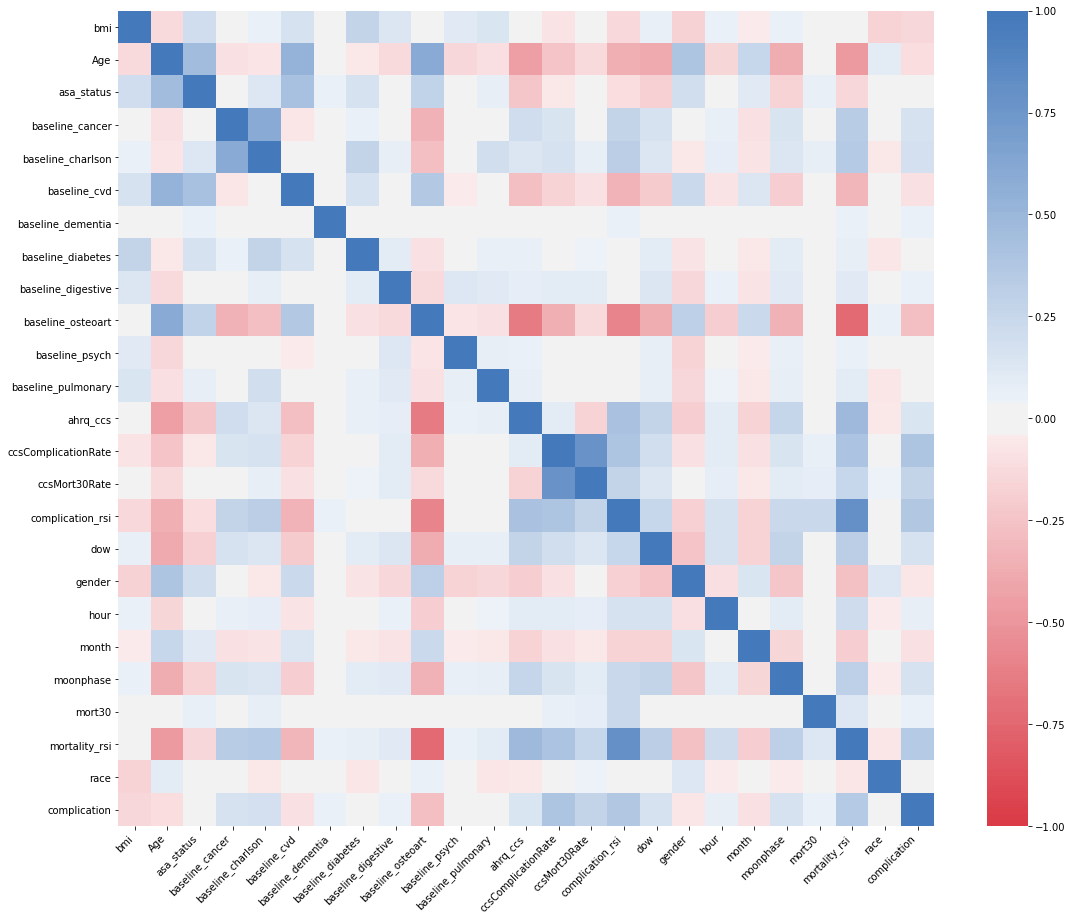

In [12]:
plt.figure(figsize=(19, 15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 250, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Pairplot Diagram

Pairplot diagram is another useful plot which display the distribution data of one feature in comparison to another feature.

By a general analys, it can be derived that we have 24 diverse feature 


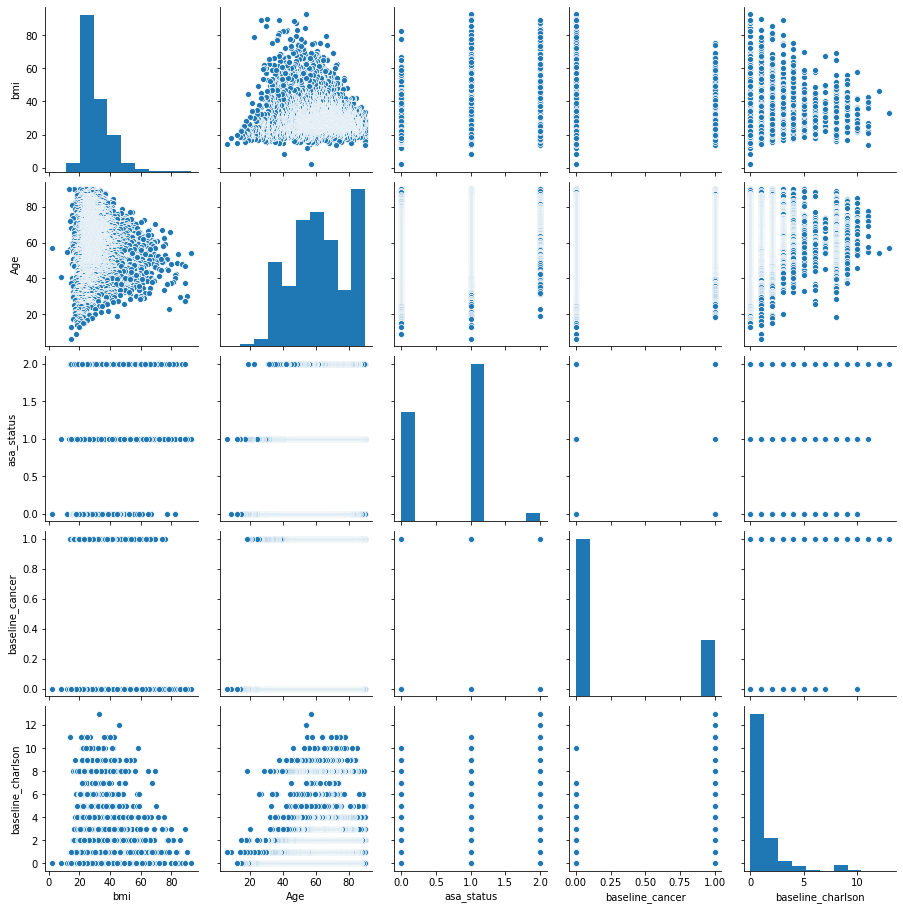

In [13]:
sns.pairplot(X.iloc[:, :5])

## Feature Distribution Histogram

We check the distribution of each feature data indivisualy using histograms.
one of the main role of this histograms is to detect categorical features and transform and represent them as one hot vectors

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f775ce06ba8>,
      dtype=object)

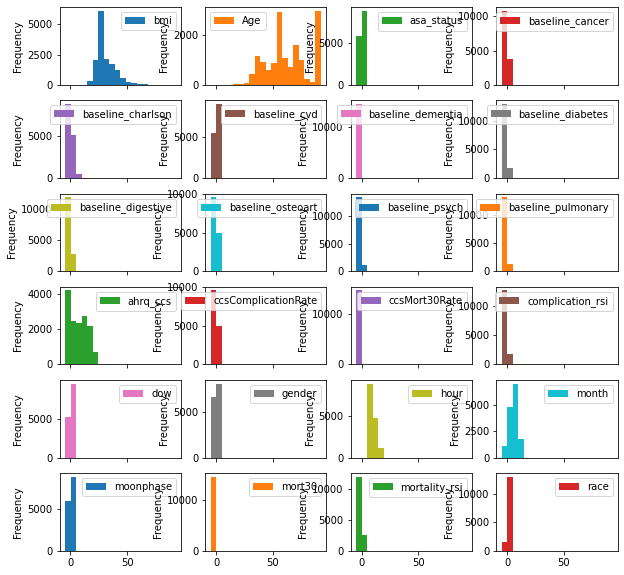

In [14]:
X.plot.hist(subplots=True, layout=(6,4), figsize=(10, 10), bins=20)

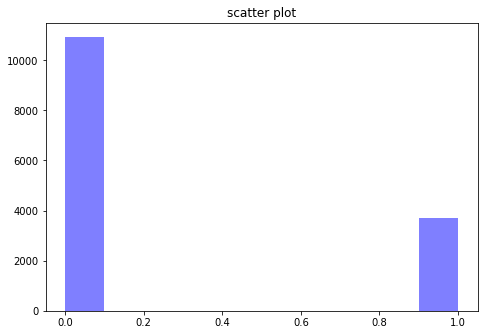

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(y, facecolor='blue', alpha=0.5)
ax.set_title('scatter plot')
plt.show()

By heeding the diagram above, it can be seen that the count of samples with label 0 is almost double the count of other label and it can effect the training process. However this difference isnt much and we can endure it.

# Data Prepocessing



## One-Hot Encoding

All of the features are categorical but just have 2 classes. So one-hot encoding is not neccessary.

## Pandas Dataframe To Numpy Array Transform

In [16]:
X = X.values
y = y.values
print(X.shape)
print(y.shape)

(14635, 24)
(14635,)


## Train-Test Split

We take 70% of data for training process and the rest for test.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [18]:
print("X_train.shape",X_train.shape)
print("X_test.shape",X_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

X_train.shape (10244, 24)
X_test.shape (4391, 24)
y_train.shape (10244,)
y_test.shape (4391,)


## Data Standardization


In [19]:
scaler = StandardScaler().fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)
print(X_train_standardized.shape)
print(X_test_standardized.shape)

(10244, 24)
(4391, 24)


## Data Normalization

In [20]:
transformer = Normalizer().fit(X_train)
X_train_normalized = transformer.transform(X_train)
X_test_normalized = transformer.transform(X_test)
print(X_train_normalized.shape)
print(X_test_normalized.shape)

(10244, 24)
(4391, 24)


## Dimension Reduction Using PCA

In [21]:
pca = PCA(n_components=3, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.fit_transform(X_test_standardized)
print(X_train_pca.shape)
print(X_test_pca.shape)

(10244, 3)
(4391, 3)


# Usefull Functions

## Compare Function

This function is used to compare prediction values to real values and calculate some metrics like accuracy_score, f1_score and so on.

In [0]:
def compare(y_test, y_pred):
  print("accuracy:", accuracy_score(y_test, y_pred))
  print("precision:", precision_score(y_test, y_pred))
  print("recall:",recall_score(y_test, y_pred))
  print("f1score:", f1_score(y_test,y_pred))
  print("confusion matrix:", confusion_matrix(y_test, y_pred))
  return

## Train Analys Function

In [0]:
def train_analys(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, color="red", label='Training loss')
  plt.plot(epochs, val_loss, color="blue", label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.clf()
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.plot(epochs, acc, color="red", label='Training acc')
  plt.plot(epochs, val_acc, color="blue", label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  
  return

# Random Forest Model



## Model Builder Function

In [0]:
def rf_model_builder(n_estimators=20):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, verbose=1)
    return rf

## Model Trainer Function

In [0]:
def rf_model_trainer(model, X_train, y_train):
  model.fit(X_train, y_train)
  return model

## Model Predictor Function

In [0]:
def rf_model_predictor(model, X_test):
  y_pred = model.predict(X_test)
  y_pred = y_pred.round().astype(int)
  return y_pred

## Model Creation

In [0]:
rf_classifier = rf_model_builder(1000)

## Train & Predict On Standard Data

In [28]:
rf_classifier = rf_model_trainer(rf_classifier, X_train_standardized, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.5s finished


In [29]:
y_pred = rf_model_predictor(rf_classifier, X_test_standardized)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [30]:
compare(y_test, y_pred)

accuracy: 0.8590298337508541
precision: 0.8245614035087719
recall: 0.5554545454545454
f1score: 0.6637696903856599
confusion matrix: [[3161  130]
 [ 489  611]]


## Feature Importance

Moreover we can identify the importance of each feature in our model

In [31]:
rf_classifier.feature_importances_

array([0.09931293, 0.21079268, 0.01585421, 0.00885407, 0.02603571,
       0.01175111, 0.00110033, 0.00785593, 0.01096026, 0.01360835,
       0.00701394, 0.00626722, 0.03719328, 0.07498381, 0.04788844,
       0.11706773, 0.03260109, 0.01108474, 0.06934981, 0.0460885 ,
       0.0290088 , 0.00068386, 0.10205952, 0.01258369])

## Train & Predict On PCA Data

In [0]:
rf_classifier = rf_model_builder(1000)

In [33]:
rf_classifier = rf_model_trainer(rf_classifier, X_train_pca, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.6s finished


In [34]:
y_pred = rf_model_predictor(rf_classifier, X_test_pca)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [35]:
compare(y_test, y_pred)

accuracy: 0.7551810521521294
precision: 0.5164257555847569
recall: 0.3572727272727273
f1score: 0.42235357334766255
confusion matrix: [[2923  368]
 [ 707  393]]


## Conclusion

It seems that using all the features help us to get better accuracy and dimension reduction doesn't work in a good way.

# DNN Model Definition

## Model Builder Function

We are using a sequential model with multiple Dense and Dropout layers. 
One note is that to prevent overfitting we use both regularization in our dense layers and dropout layer.
Another prominent feature of our model is that for initialization we use GloroUniform wich use Xavier which can increase converge time and have been proved to work well with relu

In [0]:
def dnn_model_builder(layer_nodes = 64, dropout = 0.3, alpha = 0.001, input_shape = (24,)):
    model = Sequential()
    
    model.add(Dense(layer_nodes, activation='relu', kernel_initializer=GlorotUniform() ,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), input_shape=input_shape))
    model.add(Dropout(dropout))

    model.add(Dense(layer_nodes, activation='relu', kernel_initializer=GlorotUniform(), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dropout(dropout))

    model.add(Dense(layer_nodes, activation='relu', kernel_initializer=GlorotUniform(), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dropout(dropout))
     
    model.add(Dense(layer_nodes, activation='relu', kernel_initializer=GlorotUniform(), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dropout(dropout))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=Adam(lr=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
                  metrics=['accuracy'])
    
    return model

## Model Trainer Function

In [0]:
def dnn_model_trainer(model, X_train, y_train, epochs=300, batch_size=32, shuffle=True, validation_split=0.2):
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,shuffle=shuffle, validation_split=validation_split)
  return model, history

## Model Predictor Function

In [0]:
def dnn_model_predictor(model, X_test):
  y_pred = model.predict(X_test)
  y_pred = y_pred.round().astype(int)
  return y_pred

## Model Creatrion

In [42]:
dnn_classifier = dnn_model_builder(input_shape=(X_train_standardized.shape[1], ))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Train & Prediction On Standard Data




In [43]:
dnn_classifier, history = dnn_model_trainer(dnn_classifier, X_train_standardized, y_train)

Train on 8195 samples, validate on 2049 samples
Epoch 1/300
8195/8195 [==============================] - 1s 77us/sample - loss: 1.6990 - accuracy: 0.7536 - val_loss: 1.1780 - val_accuracy: 0.7911
Epoch 2/300
8195/8195 [==============================] - 1s 65us/sample - loss: 0.9393 - accuracy: 0.7876 - val_loss: 0.7360 - val_accuracy: 0.7945
Epoch 3/300
8195/8195 [==============================] - 1s 66us/sample - loss: 0.6662 - accuracy: 0.7902 - val_loss: 0.5949 - val_accuracy: 0.7926
Epoch 4/300
8195/8195 [==============================] - 1s 63us/sample - loss: 0.5765 - accuracy: 0.7887 - val_loss: 0.5422 - val_accuracy: 0.8009
Epoch 5/300
8195/8195 [==============================] - 1s 66us/sample - loss: 0.5494 - accuracy: 0.7855 - val_loss: 0.5219 - val_accuracy: 0.8004
Epoch 6/300
8195/8195 [==============================] - 1s 64us/sample - loss: 0.5301 - accuracy: 0.7921 - val_loss: 0.5087 - val_accuracy: 0.7970
Epoch 7/300
8195/8195 [==============================] - 1s 65us

In [0]:
y_pred = dnn_model_predictor(dnn_classifier, X_test_standardized)

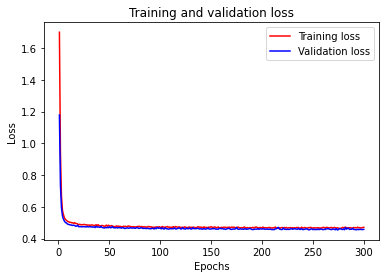

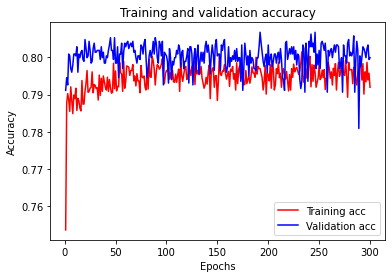

In [45]:
train_analys(history)

In [46]:
compare(y_test, y_pred)

accuracy: 0.7938966066955135
precision: 0.6167664670658682
recall: 0.4681818181818182
f1score: 0.5322997416020673
confusion matrix: [[2971  320]
 [ 585  515]]


## Train & Prediction On PCA Data

In [0]:
dnn_classifier = dnn_model_builder(input_shape=(X_train_pca.shape[1], ))

In [48]:
dnn_classifier, history = dnn_model_trainer(dnn_classifier, X_train_pca, y_train)

Train on 8195 samples, validate on 2049 samples
Epoch 1/300
8195/8195 [==============================] - 1s 83us/sample - loss: 1.3325 - accuracy: 0.7689 - val_loss: 0.8178 - val_accuracy: 0.7892
Epoch 2/300
8195/8195 [==============================] - 1s 63us/sample - loss: 0.6795 - accuracy: 0.7783 - val_loss: 0.5838 - val_accuracy: 0.7906
Epoch 3/300
8195/8195 [==============================] - 1s 66us/sample - loss: 0.5702 - accuracy: 0.7758 - val_loss: 0.5375 - val_accuracy: 0.7901
Epoch 4/300
8195/8195 [==============================] - 1s 64us/sample - loss: 0.5435 - accuracy: 0.7791 - val_loss: 0.5242 - val_accuracy: 0.7926
Epoch 5/300
8195/8195 [==============================] - 1s 66us/sample - loss: 0.5300 - accuracy: 0.7819 - val_loss: 0.5140 - val_accuracy: 0.7897
Epoch 6/300
8195/8195 [==============================] - 1s 72us/sample - loss: 0.5238 - accuracy: 0.7819 - val_loss: 0.5108 - val_accuracy: 0.7892
Epoch 7/300
8195/8195 [==============================] - 1s 69us

In [0]:
y_pred = dnn_model_predictor(dnn_classifier, X_test_pca)

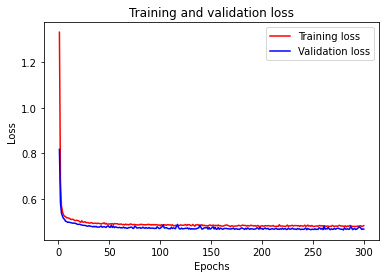

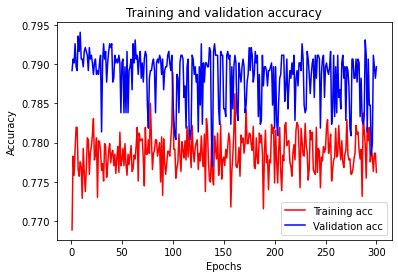

In [50]:
train_analys(history)

Becuase the difference and gap between Training loss and validation loss is infinitesimal, we can conclude that our model isnt overfitted on training set.

In [51]:
compare(y_test, y_pred)

accuracy: 0.7640628558414939
precision: 0.5385542168674698
recall: 0.40636363636363637
f1score: 0.46321243523316064
confusion matrix: [[2908  383]
 [ 653  447]]


## DNN Hyperparameter Tuning

in order to tune our parameter, we decide to use a grid search and find best parameters

In [61]:
grid_values = {
    'layer_nodes': ['64', '128', '256'],
    'dropout':[0.2, 0.3, 0.5],
    'alpha' : [0.0001, 0.001, 0.01]
    }

top = {"layer_nodes": 64, "dropout": 0.3, "alpha": 0.001}
top_val = 0
for i in grid_values['layer_nodes']:
    for j in grid_values["dropout"]:
        for k in grid_values["alpha"]:
            print("training model on : { layer nodes : %s, dropout: %s, alpha : %s }" % (i, j, k))
            
            dnn_classifier_drid = dnn_model_builder(layer_nodes = i, dropout = j, alpha = k, input_shape=(X_train_standardized.shape[1], ))
            grid_history = dnn_classifier_drid.fit(X_train_standardized, y_train, epochs=200, batch_size=32 ,shuffle=True, validation_split=0.2, verbose = 0)
            
            temp = grid_history.history["accuracy"][-1]
            print("model accuracy on trainset : % f" % (temp))
            if temp > top_val:
                top_val = temp
                top = {"layer_nodes": i, "dropout": j, "alpha": k}

print("best values are : { layer nodes : %s, dropout: %s, alpha : %s }" % (top["layer_nodes"], top["dropout"], top["alpha"]))

training model on : { layer nodes : 64, dropout: 0.2, alpha : 0.0001 }
model accuracy on trainset :  0.799268
training model on : { layer nodes : 64, dropout: 0.2, alpha : 0.001 }
model accuracy on trainset :  0.796949
training model on : { layer nodes : 64, dropout: 0.2, alpha : 0.01 }
model accuracy on trainset :  0.781574
training model on : { layer nodes : 64, dropout: 0.3, alpha : 0.0001 }
model accuracy on trainset :  0.795485
training model on : { layer nodes : 64, dropout: 0.3, alpha : 0.001 }
model accuracy on trainset :  0.799756
training model on : { layer nodes : 64, dropout: 0.3, alpha : 0.01 }
model accuracy on trainset :  0.767663
training model on : { layer nodes : 64, dropout: 0.5, alpha : 0.0001 }
model accuracy on trainset :  0.790360
training model on : { layer nodes : 64, dropout: 0.5, alpha : 0.001 }
model accuracy on trainset :  0.776205
training model on : { layer nodes : 64, dropout: 0.5, alpha : 0.01 }
model accuracy on trainset :  0.760220
training model on :

# Conclusion

it seams that our model has a better score on our full data and pca lacks in getting the data complexity. however it sounds that the model have some issue on f1score and the number of false positives and true negatives are marginally high. This could be due to having imbalance data. So in the final step we try to first balance our data (base on our target) and retrain our model again

# Final Step

try to balance our model and re-train it

In [78]:
print("Aggregate count of targets with label == 0 is : %d" %(len(y_train[y_train == 0])))
print("Aggregate count of targets with label == 1 is : %d" %(len(y_train[y_train == 1])))

Aggregate count of targets with label == 0 is : 7654
Aggregate count of targets with label == 1 is : 2590


In [0]:
count_label_zero = len(y_train[y_train == 0])
count_label_one = len(y_train[y_train == 1])

X_train_standardized_balance = []
y_train_balance = []
counter_balance = 0

for i in range(len(X_train_standardized)):
    if (y_train[i] == 0 and count_label_zero < count_label_one):
        X_train_standardized_balance.append(X_train_standardized[i])
        y_train_balance.append(y_train[i])
    if (y_train[i] == 0 and count_label_zero > count_label_one and counter_balance < count_label_one):
        X_train_standardized_balance.append(X_train_standardized[i])
        y_train_balance.append(y_train[i])
        counter_balance += 1
    
    if (y_train[i] == 1 and count_label_zero > count_label_one):
        X_train_standardized_balance.append(X_train_standardized[i])
        y_train_balance.append(y_train[i])
    if (y_train[i] == 1 and count_label_zero < count_label_one and counter_balance < count_label_zero):
        X_train_standardized_balance.append(X_train_standardized[i])
        y_train_balance.append(y_train[i])
        counter_balance += 1

X_train_standardized_balance = np.array(X_train_standardized_balance)
y_train_balance = np.array(y_train_balance)

In [83]:
print("Aggregate count of targets with label == 0 after make our training set balance is : %d" %(len(y_train_balance[y_train_balance == 0])))
print("Aggregate count of targets with label == 1 after make our training set balance is : %d" %(len(y_train_balance[y_train_balance == 1])))

Aggregate count of targets with label == 0 after make our training set balance is : 2590
Aggregate count of targets with label == 1 after make our training set balance is : 2590


## Model Creation

In [0]:
dnn_classifier_balance = dnn_model_builder(layer_nodes = 128, dropout = 0.3, alpha = 0.001, input_shape=(X_train_standardized_balance.shape[1], ))

## Train and Predict model

In [86]:
dnn_classifier_balance, history_balance = dnn_model_trainer(dnn_classifier_balance, X_train_standardized_balance, y_train_balance)

Train on 4144 samples, validate on 1036 samples
Epoch 1/300
4144/4144 [==============================] - 8s 2ms/sample - loss: 3.4706 - accuracy: 0.7029 - val_loss: 2.2773 - val_accuracy: 0.6207
Epoch 2/300
4144/4144 [==============================] - 1s 237us/sample - loss: 1.5168 - accuracy: 0.7447 - val_loss: 1.2803 - val_accuracy: 0.5840
Epoch 3/300
4144/4144 [==============================] - 1s 245us/sample - loss: 0.9039 - accuracy: 0.7466 - val_loss: 1.0116 - val_accuracy: 0.5695
Epoch 4/300
4144/4144 [==============================] - 1s 240us/sample - loss: 0.7376 - accuracy: 0.7495 - val_loss: 0.8309 - val_accuracy: 0.6245
Epoch 5/300
4144/4144 [==============================] - 1s 236us/sample - loss: 0.6666 - accuracy: 0.7543 - val_loss: 0.9690 - val_accuracy: 0.4932
Epoch 6/300
4144/4144 [==============================] - 1s 227us/sample - loss: 0.6319 - accuracy: 0.7502 - val_loss: 0.8204 - val_accuracy: 0.5898
Epoch 7/300
4144/4144 [==============================] - 1s 

In [0]:
y_pred = dnn_model_predictor(dnn_classifier_balance, X_test_standardized)

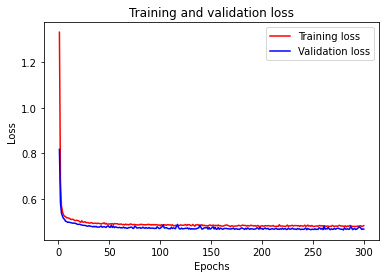

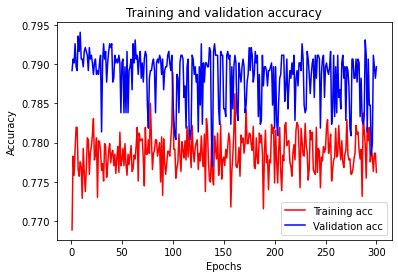

In [88]:
train_analys(history)

In [89]:
compare(y_test, y_pred)

accuracy: 0.7891140970166249
precision: 0.5825426944971537
recall: 0.5581818181818182
f1score: 0.5701021355617457
confusion matrix: [[2851  440]
 [ 486  614]]


## conclusion

It can be seen that the fscore has been improved after training our model on balanced data.